In [ ]:
#Regular EDA(Exploratory Data Analysis) & Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/PCOS_infertility.csv')
df

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [ ]:
df1 = pd.read_excel('/content/PCOS_data_without_infertility.xlsx',sheet_name="Full_new")
df1

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [ ]:
#Merging the two files as per patient file no. 
data = pd.merge(df1,df, on='Patient File No.', suffixes={'','_y'},how='left')

<ipython-input-4-1accf9c5909f>:2: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data = pd.merge(df1,df, on='Patient File No.', suffixes={'','_y'},how='left')


In [ ]:
#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

In [ ]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
data.drop('Sl. No',axis=1,inplace=True)
data.drop('Patient File No.',axis=1,inplace=True)

In [ ]:
data['Blood Group'].value_counts()

15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64

In [ ]:
def Print_values(dfs):
  for i in dfs.columns:
    print(i,":-")
    print(dfs[f'{i}'].value_counts())
    print("\n")
    print("****************************************************")

Print_values(data)

PCOS (Y/N) :-
0    364
1    177
Name: PCOS (Y/N), dtype: int64


****************************************************
 Age (yrs) :-
28    45
32    44
35    37
30    37
27    35
29    34
31    33
36    33
26    32
34    29
33    25
38    20
25    18
23    18
40    15
24    15
37    15
41     9
39     9
22     8
20     6
42     6
45     4
44     3
21     3
43     3
47     3
48     1
46     1
Name:  Age (yrs), dtype: int64


****************************************************
Weight (Kg) :-
60.0    36
50.0    34
52.0    27
65.0    25
56.0    22
        ..
56.4     1
53.4     1
68.6     1
64.3     1
63.2     1
Name: Weight (Kg), Length: 117, dtype: int64


****************************************************
Height(Cm)  :-
158.000    67
152.000    66
150.000    46
154.000    38
155.000    27
161.000    24
160.000    24
162.000    21
156.000    21
153.000    19
148.000    17
165.000    17
159.000    16
163.000    14
164.000    13
157.000    13
158.496    11
151.000     9
145.000     6
170.

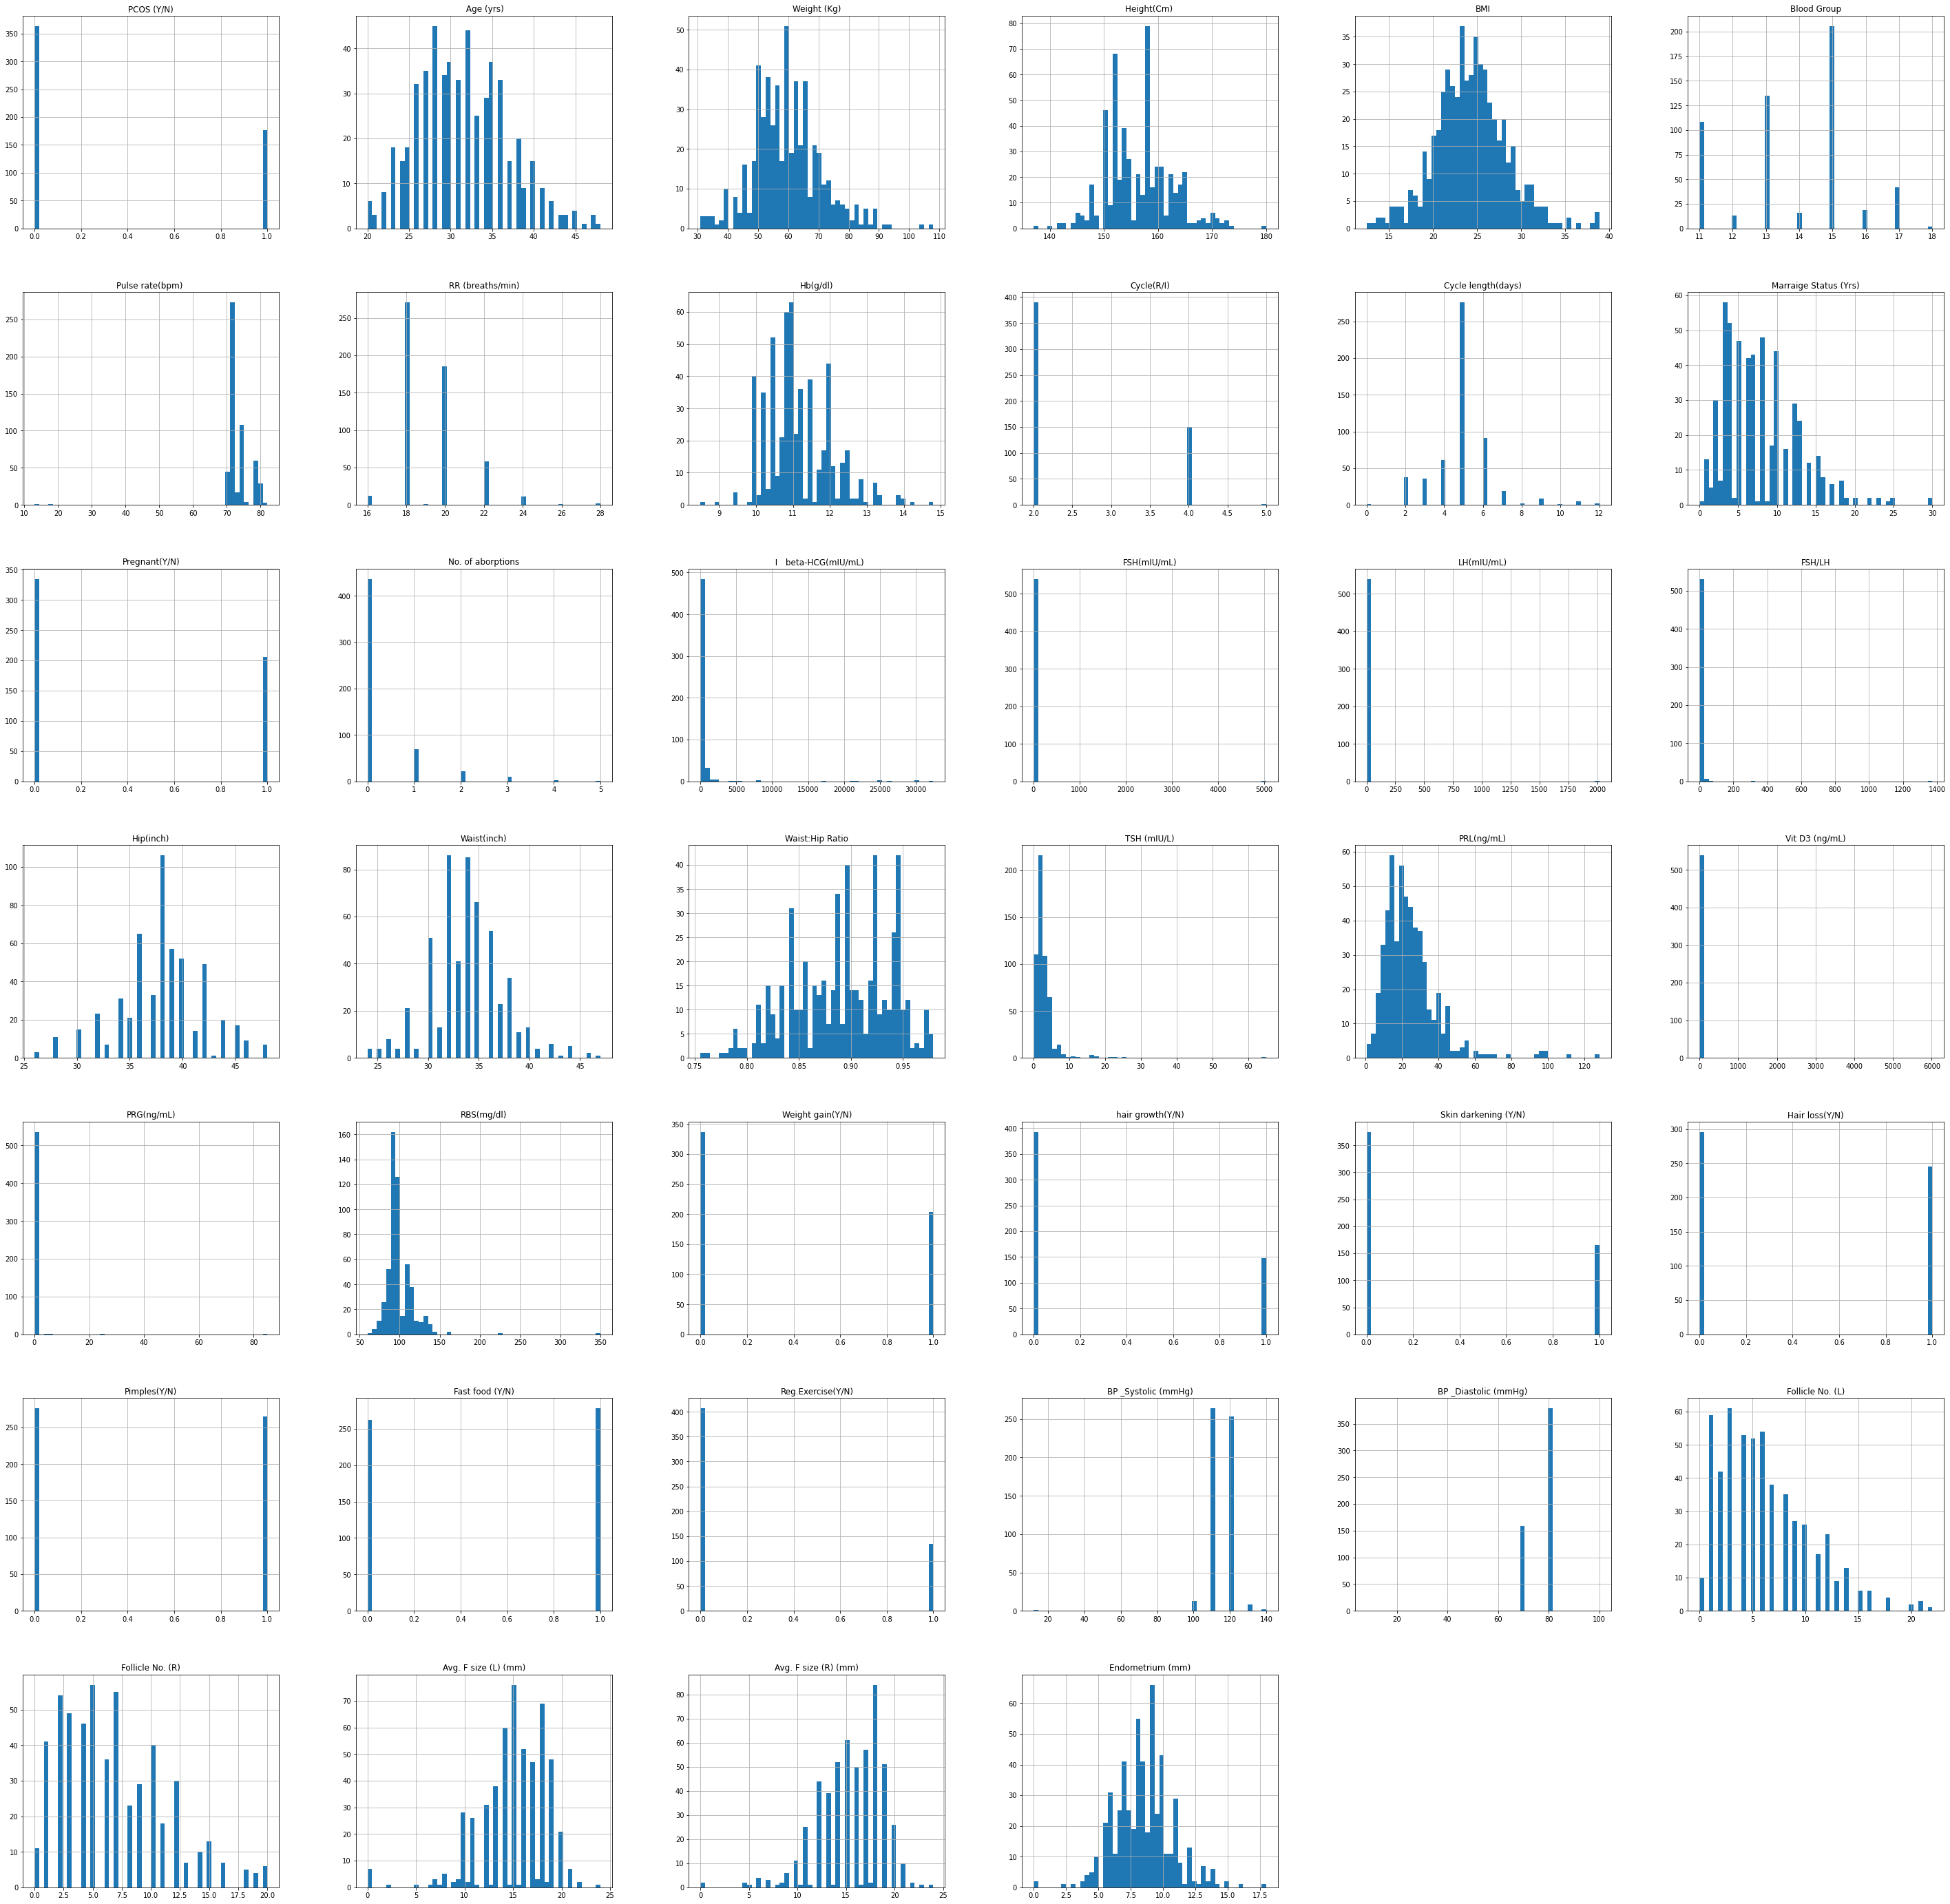

In [ ]:
data.hist(bins=50,figsize=(50,50));

In [ ]:
Weight_i = []
y=0

for i in data['Weight (Kg)']:
  if i>100:
    Weight_i.append(y)

  y+=1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [ ]:
Height_i = []
y=0

for i in data.iloc[:,3]:
  if i>175:
    Height_i.append(y)
  if i<140:
    Height_i.append(y)

  y+=1

In [ ]:
BMI_i = []
y=0

for i in data['BMI']:
  if i>35:
    BMI_i.append(y)

  y+=1

In [ ]:
RR_i = []
y=0

for i in data['RR (breaths/min)']:
  if i>25:
    RR_i.append(y)

  y+=1

In [ ]:
Hb_i = []
y=0

for i in data['Hb(g/dl)']:
  if i>14:
    Hb_i.append(y)
  if i<9:
    Hb_i.append(y)

  y+=1

In [ ]:
def removal_outlier(columns,u,v=0,two=False,range=False):
  if (two==True and range==False):
    Column_i = []
    y=0

    for i in data[columns]:
      if i>u:
        Column_i.append(y)
      if i<v:
        Column_i.append(y)

      y+=1

  if (two==False and range==False):
    Column_i = []
    y=0

    for i in data[columns]:
      if i>u:
        Column_i.append(y)

      y+=1

  if (two==False and range==False):
    Column_i = []
    y=0

    for i in data[columns]:
      if i>u:
        Column_i.append(y)

      y+=1

  if (range==True):
    Column_i = []
    y=0

    for i in data[columns]:
      if i==u:
        Column_i.append(y)

      y+=1
  
  return Column_i

In [ ]:
Cycle_i = removal_outlier('Cycle(R/I)',u=5,range=True)
Cycle_length_i = removal_outlier('Cycle length(days)',u=0,range=True)
Marraige_Status_i = removal_outlier('Marraige Status (Yrs)',u=25)
I_beta_HCG_Status_i = removal_outlier('  I   beta-HCG(mIU/mL)',u=15000)
FSH_i = removal_outlier('FSH(mIU/mL)',u=5000,range=True)
LH_i = removal_outlier('LH(mIU/mL)',u=2000,range=True)
FSH_LH_i = removal_outlier('FSH/LH',u=200)
TSH_i = removal_outlier('TSH (mIU/L)',u=20)
PRL_i = removal_outlier('PRL(ng/mL)',u=100)
RBS_i = removal_outlier('RBS(mg/dl)',u=200)
Avg_F_Size_L_i = removal_outlier('Avg. F size (L) (mm)',u=23,v=5,two=True)
Avg_F_size_R_i = removal_outlier('Avg. F size (R) (mm)',u=23,v=5,two=True)
Endometrium_i = removal_outlier('Endometrium (mm)',u=16,v=2.5,two=True)

In [ ]:
drop_i = [Weight_i,Height_i,BMI_i,RR_i,Cycle_i,Cycle_length_i,Marraige_Status_i,I_beta_HCG_Status_i,FSH_i,LH_i,FSH_LH_i,TSH_i,PRL_i,RBS_i,Avg_F_Size_L_i,Avg_F_size_R_i,Endometrium_i]

for i in drop_i:
  print(i)
  print("***************")

[79, 244]
***************
[59, 105]
***************
[59, 79, 97, 244, 250, 477, 483]
***************
[5, 165, 324]
***************
[512]
***************
[39]
***************
[252, 447]
***************
[110, 111, 138, 214, 252, 315, 317, 446, 447]
***************
[]
***************
[]
***************
[250, 329]
***************
[37, 233, 278, 346]
***************
[248, 274]
***************
[178, 432]
***************
[18, 42, 75, 78, 143, 146, 411, 461, 469]
***************
[70, 72, 103, 405, 425]
***************
[39, 77, 82]
***************


In [ ]:
drop_indexes=[]

for i in range(0,len(drop_i)):
  for j in range(i,len(drop_i)):
    if i==j:
      a = drop_i[i]
    if i!=j:
      a = list(set(a)-set(drop_i[j]))
  drop_indexes.append(a)

In [ ]:
drop_index=[]

for i in drop_indexes:
  for j in i:
    drop_index.append(j)

In [ ]:
drop_index

[105,
 97,
 483,
 79,
 244,
 59,
 477,
 324,
 5,
 165,
 512,
 138,
 110,
 111,
 214,
 315,
 252,
 317,
 446,
 447,
 329,
 250,
 233,
 346,
 37,
 278,
 248,
 274,
 432,
 178,
 42,
 75,
 461,
 78,
 143,
 18,
 146,
 469,
 411,
 70,
 103,
 72,
 425,
 405,
 39,
 77,
 82]

In [ ]:
data.drop(drop_index,axis=0,inplace=True)

In [ ]:
data = data.reset_index(drop=True)
data.tail()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
489,0,35,50.0,164.592,18.5,17,72,16,11.0,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
490,0,30,63.2,158.000,25.3,15,72,18,10.8,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
491,0,36,54.0,152.000,23.4,13,74,20,10.8,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
492,0,27,50.0,150.000,22.2,15,74,20,12.0,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5
493,1,23,82.0,165.000,30.1,13,80,20,10.2,4,...,1,1.0,0,120,70,9,10,19.0,18.0,6.9


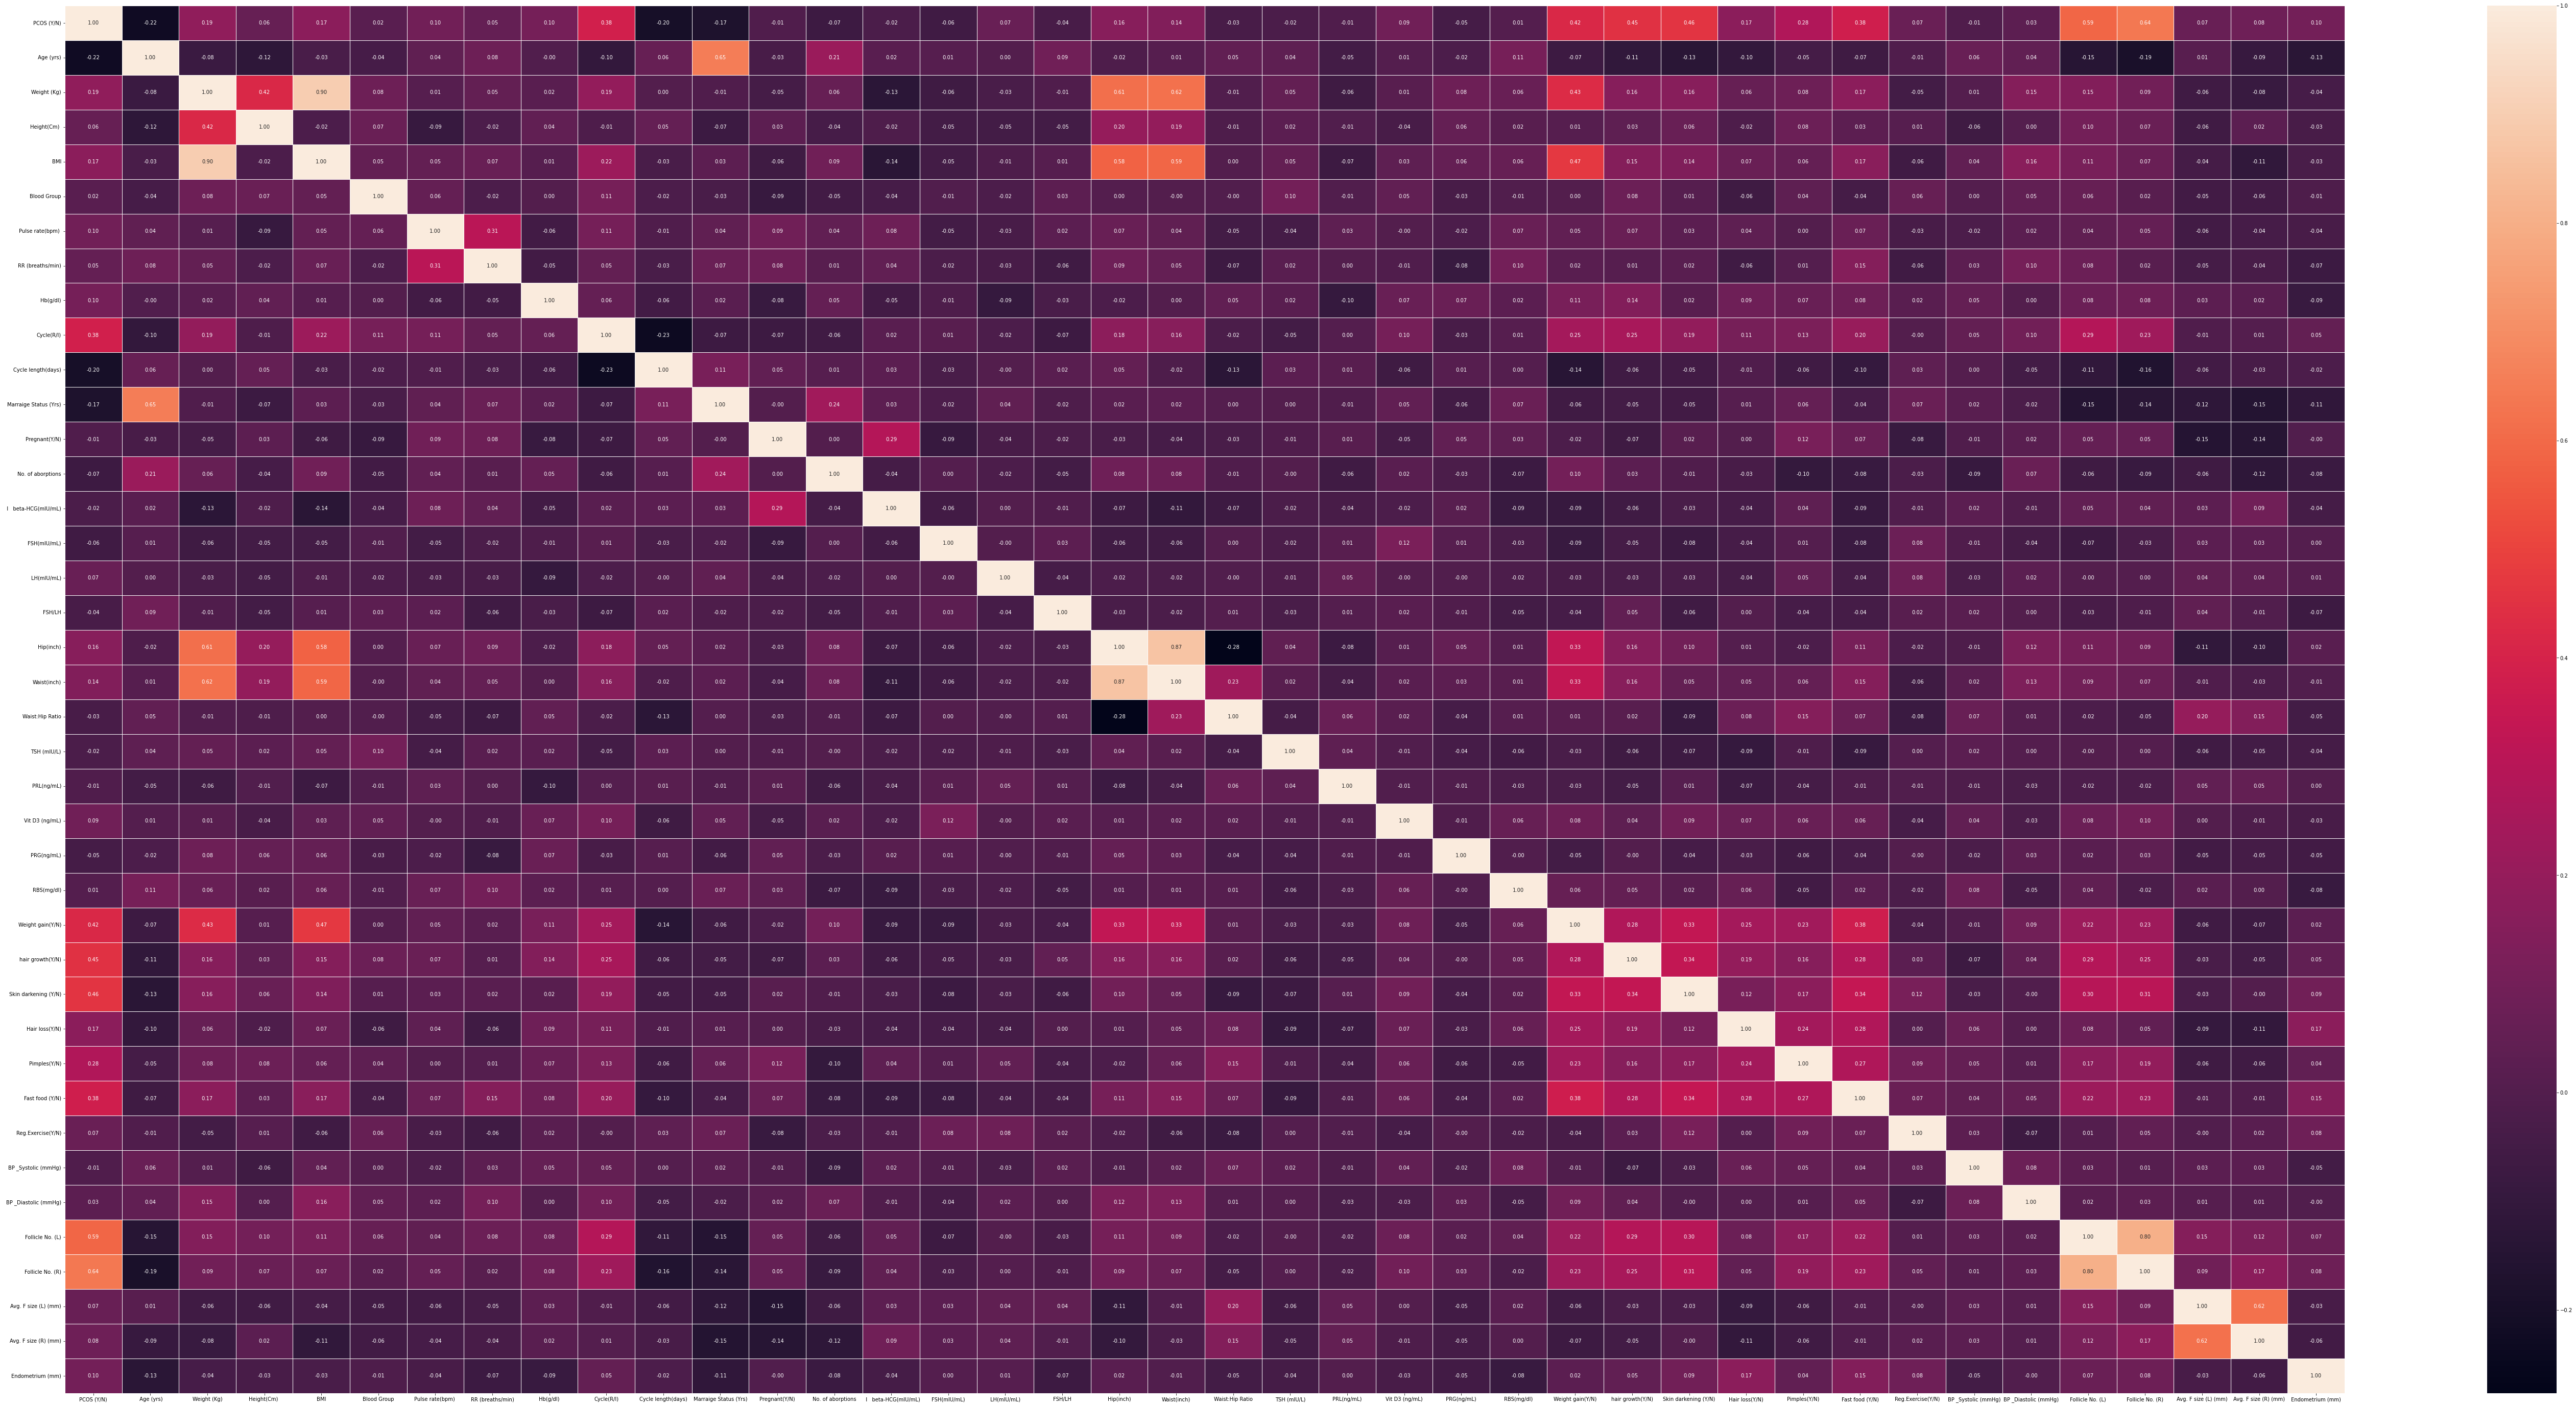

In [ ]:
corr_matrix = data.corr()
fig , ax = plt.subplots(figsize=(100,50))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

<Axes: title={'center': 'Correlation with PCOS'}>

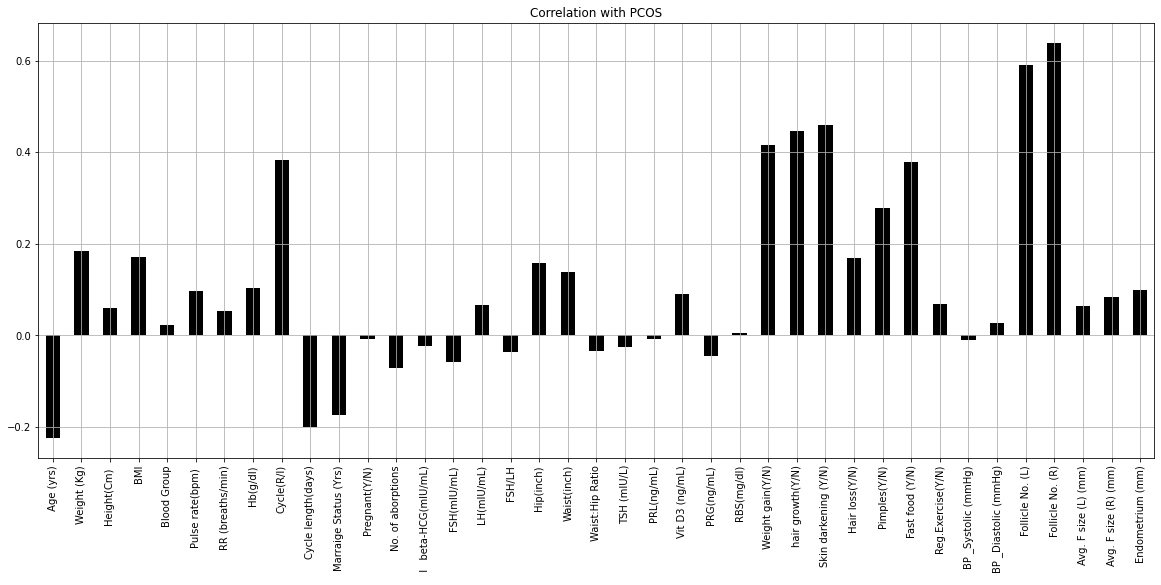

In [ ]:
data.drop('PCOS (Y/N)', axis=1).corrwith(data['PCOS (Y/N)']).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with PCOS",color="Black")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              494 non-null    int64  
 1    Age (yrs)              494 non-null    int64  
 2   Weight (Kg)             494 non-null    float64
 3   Height(Cm)              494 non-null    float64
 4   BMI                     494 non-null    float64
 5   Blood Group             494 non-null    int64  
 6   Pulse rate(bpm)         494 non-null    int64  
 7   RR (breaths/min)        494 non-null    int64  
 8   Hb(g/dl)                494 non-null    float64
 9   Cycle(R/I)              494 non-null    int64  
 10  Cycle length(days)      494 non-null    int64  
 11  Marraige Status (Yrs)   493 non-null    float64
 12  Pregnant(Y/N)           494 non-null    int64  
 13  No. of aborptions       494 non-null    int64  
 14    I   beta-HCG(mIU/mL)  494 non-null    fl

In [ ]:
#Weight,Height,Blood Group,Pregnant(Y/N),FSH(mIU/mL), FSH/LH, Waist:Hip Ratio, TSH (mIU/L),PRL(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg)

In [ ]:
#data.drop('Weight (Kg)',axis=1,inplace=True)
data.drop('Blood Group',axis=1,inplace=True)
data.drop('Pregnant(Y/N)',axis=1,inplace=True)
data.drop('FSH(mIU/mL)',axis=1,inplace=True)
data.drop('FSH/LH',axis=1,inplace=True)
data.drop('Waist:Hip Ratio',axis=1,inplace=True)
data.drop('TSH (mIU/L)',axis=1,inplace=True)
data.drop('PRL(ng/mL)',axis=1,inplace=True)
data.drop('RBS(mg/dl)',axis=1,inplace=True)
data.drop('BP _Systolic (mmHg)',axis=1,inplace=True)
data.drop('BP _Diastolic (mmHg)',axis=1,inplace=True)
data.drop('Height(Cm) ',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              494 non-null    int64  
 1    Age (yrs)              494 non-null    int64  
 2   Weight (Kg)             494 non-null    float64
 3   BMI                     494 non-null    float64
 4   Pulse rate(bpm)         494 non-null    int64  
 5   RR (breaths/min)        494 non-null    int64  
 6   Hb(g/dl)                494 non-null    float64
 7   Cycle(R/I)              494 non-null    int64  
 8   Cycle length(days)      494 non-null    int64  
 9   Marraige Status (Yrs)   493 non-null    float64
 10  No. of aborptions       494 non-null    int64  
 11    I   beta-HCG(mIU/mL)  494 non-null    float64
 12  II    beta-HCG(mIU/mL)  494 non-null    object 
 13  LH(mIU/mL)              494 non-null    float64
 14  Hip(inch)               494 non-null    in

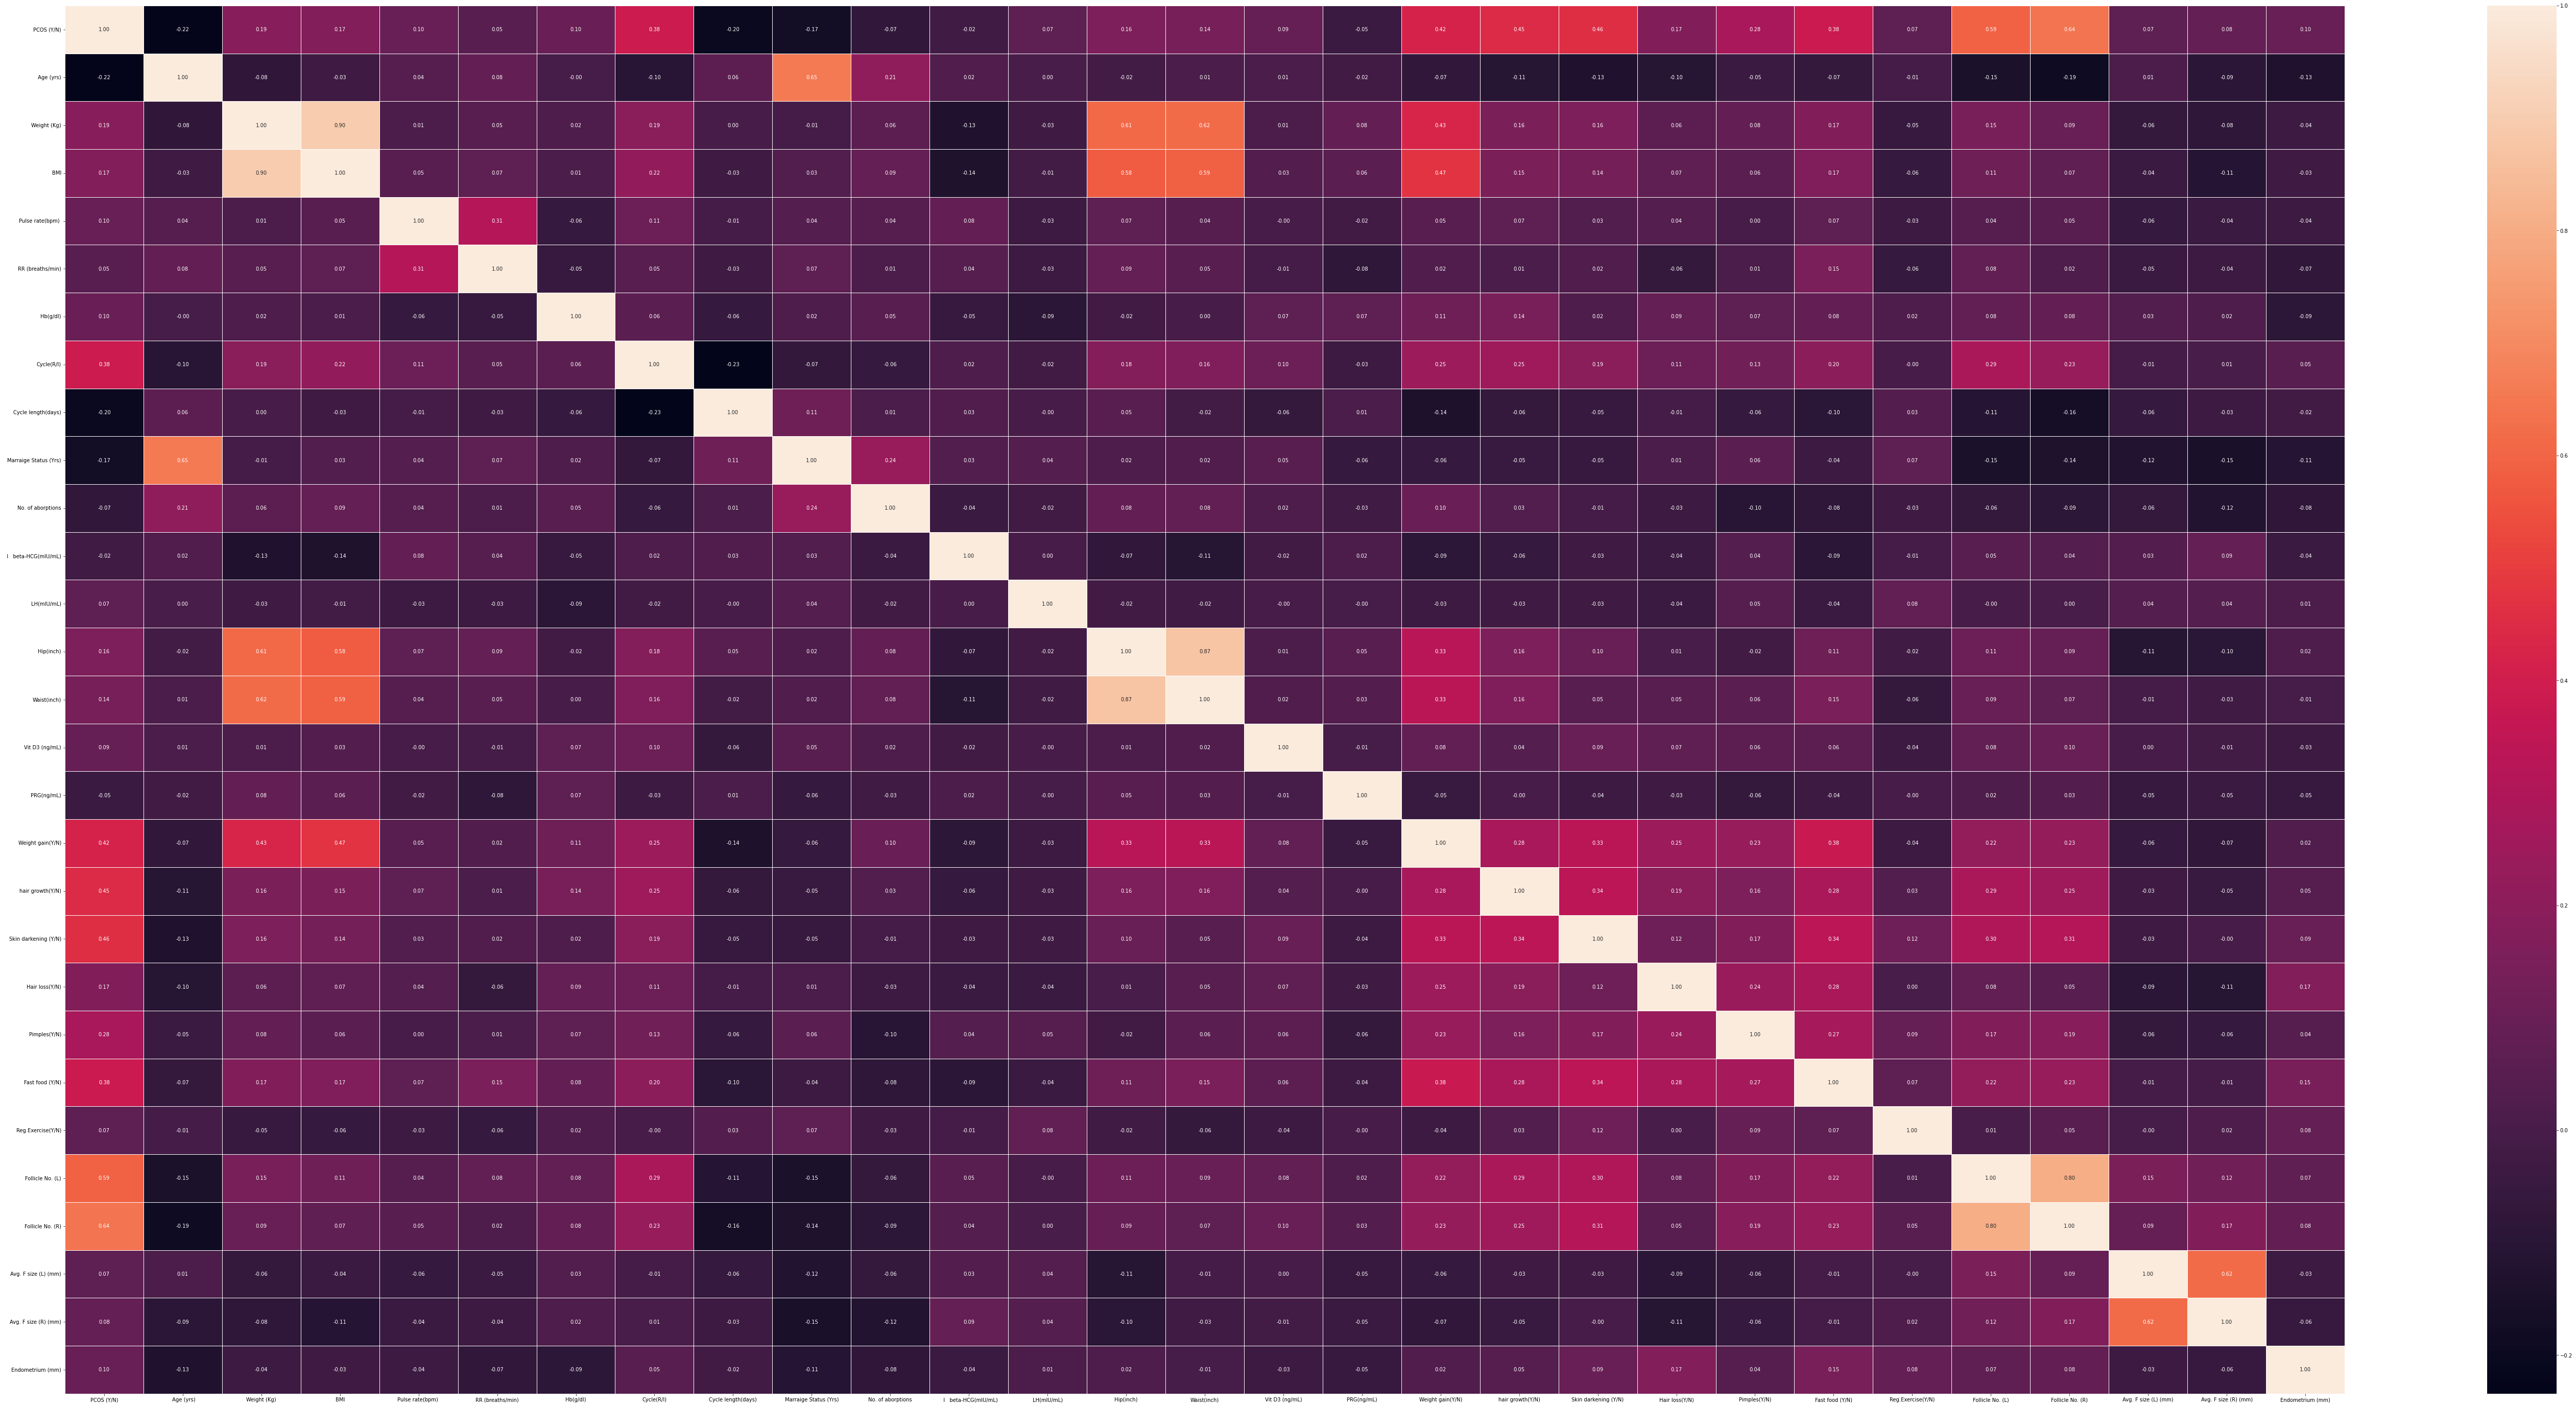

In [ ]:
corr_matrix = data.corr()
fig , ax = plt.subplots(figsize=(100,50))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

<Axes: ylabel='Frequency'>

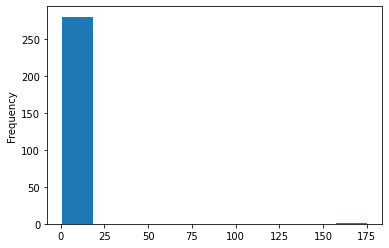

In [ ]:
data['  I   beta-HCG(mIU/mL)'].value_counts().plot(kind='hist')

<Axes: ylabel='Frequency'>

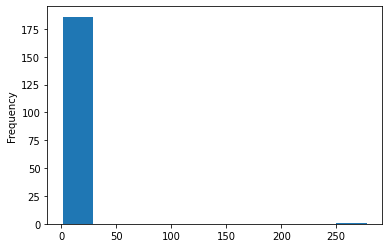

In [ ]:
data['II    beta-HCG(mIU/mL)'].value_counts().plot(kind='hist')

<Axes: ylabel='Frequency'>

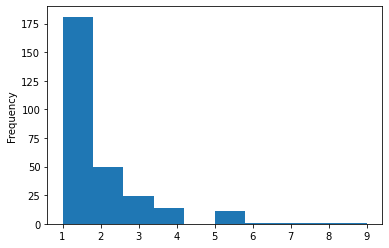

In [ ]:
data['AMH(ng/mL)'].value_counts().plot(kind='hist')

In [ ]:
data.tail()

,PCOS (Y/N),Age (yrs),Weight (Kg),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),...,Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
489,0,35,50.0,18.5,72,16,11.0,2,5,8.0,...,0,0,0,0.0,0,1,0,17.5,10.0,6.7
490,0,30,63.2,25.3,72,18,10.8,2,5,4.0,...,0,0,0,0.0,0,9,7,19.0,18.0,8.2
491,0,36,54.0,23.4,74,20,10.8,2,6,8.0,...,0,0,0,0.0,0,1,0,18.0,9.0,7.3
492,0,27,50.0,22.2,74,20,12.0,4,2,2.0,...,0,0,1,0.0,0,7,6,18.0,16.0,11.5
493,1,23,82.0,30.1,80,20,10.2,4,7,2.0,...,1,1,1,1.0,0,9,10,19.0,18.0,6.9


In [ ]:
I_Beta = removal_outlier('  I   beta-HCG(mIU/mL)',u=150)

In [ ]:
data.drop(I_Beta,axis=0,inplace=True)

In [ ]:
data['AMH(ng/mL)'].unique()

array([2.07, 1.53, 1.22, 3.05, 1.54, 1, 1.61, 1.67, 2.38, 0.88, 0.69,
       1.92, 2.85, 2.5, 3.84, 3.56, 1.89, 2.34, 1.58, 2.78, 2.36, 2.35,
       3.66, 4.5, 3.2, 1.2, 3.22, 2.31, 3.21, 2.14, 4.6, 2.3, 5.8, 2.58,
       0.35, 6.56, 1.65, 2.06, 3.81, 3.65, 8.98, 1.7, 3.18, 2.75, 0.86,
       2.29, 8.46, 1.04, 4.27, 3.86, 1.42, 10.07, 3.9, 10, 3.3, 12.7, 3.6,
       15, 5, 17.9, 19.8, 9.2, 5.14, 2.4, 0.3, 19.3, 8.8, 4.3, 1.4, 4.8,
       17.1, 2.1, 11.6, 18.4, 9.9, 3.7, 2, 4, 1.6, 7.51, 10.04, 6.86,
       7.02, 8.75, 5.27, 9, 3.41, 0.45, 2.53, 0.29, 2.01, 2.83, 5.67,
       3.49, 8, 11.48, 32, 3.38, 1.35, 4.66, 1.99, 3.99, 5.69, 7.81, 6.41,
       1.68, 6.65, 4.15, 1.86, 7.25, 1.91, 5.61, 3.02, 5.25, 3.17, 5.57,
       4.57, 0.37, 16.9, 26.4, 9.1, 22, 1.9, 17.6, 1.1, 7.8, 2.9, 0.2, 12,
       3.14, 1.25, 3.29, 2.69, 14.6, 1.5, 6.8, 4.2, 0.9, 16.8, 8.5, 66,
       26.8, 1.15, 4.1, 0.16, 1.8, 7.3, 15.3, 4.7, 5.4, 17.5, 6, 10.8,
       18.7, 18, 0.28, 'a', 1.03, 3, 11, 6.33, 1.3, 14.7, 2

In [ ]:
data['II    beta-HCG(mIU/mL)'].unique()

array([1.99, 100.51, 13, 15, 10, 20, 9.83, 141.06, 145.89, 100.09, 110.17,
       14.4, 2, 12.17, 25.3, 479.66, 586.06, '1.99.', 15.36, 54.08, 3.05,
       57.08, 23.5, 4.32, 3.888, 1.65, 2.58, 108.66, 3.99, 122.58, 122.3,
       2.8, 147.6, 12.37, 144.63, 99.69, 70.42, 148.52, 18.36, 638.52,
       4.76, 18.13, 89.34, 75.62, 1.9, 3.9, 783.36, 12, 78.38, 183.06,
       61.98, 34.65, 48.86, 109.06, 18.49, 53.82, 10.45, 116.31, 5.39,
       6.19, 3.01, 10.84, 4.2, 10.4, 41.75, 67.2, 6.921, 0.99, 103.5,
       102.87, 90.67, 238.14, 181.23, 19.44, 13.12, 8, 9.35, 56.4, 168.99,
       10.24, 104.87], dtype=object)

In [ ]:
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].replace(['1.99.'],'1.99')

In [ ]:
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].astype(float)

In [ ]:
AMH = list(df['AMH(ng/mL)'].unique())
AMH.remove('a')
AMH = np.array(AMH)
AMH = AMH.astype(float)
AMH = AMH.mean()

In [ ]:
data['AMH(ng/mL)'] = data['AMH(ng/mL)'].replace(['a'],f'{AMH}')

In [ ]:
data['AMH(ng/mL)'] = data['AMH(ng/mL)'].astype(float)

In [ ]:
II_Beta_i = removal_outlier('II    beta-HCG(mIU/mL)',u=100)

In [ ]:
II_Beta_mean = np.array(data['II    beta-HCG(mIU/mL)']).mean()
AMH_mean = np.array(data['AMH(ng/mL)']).mean()

In [ ]:
AMH_i = removal_outlier('AMH(ng/mL)',u=6)

In [ ]:
for i in II_Beta_i:
  data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].replace(data.iloc[i,12],II_Beta_mean)

AMH_i = removal_outlier('AMH(ng/mL)',u=6)

for i in AMH_i:
  data['AMH(ng/mL)'] = data['AMH(ng/mL)'].replace([i,16],AMH_mean)

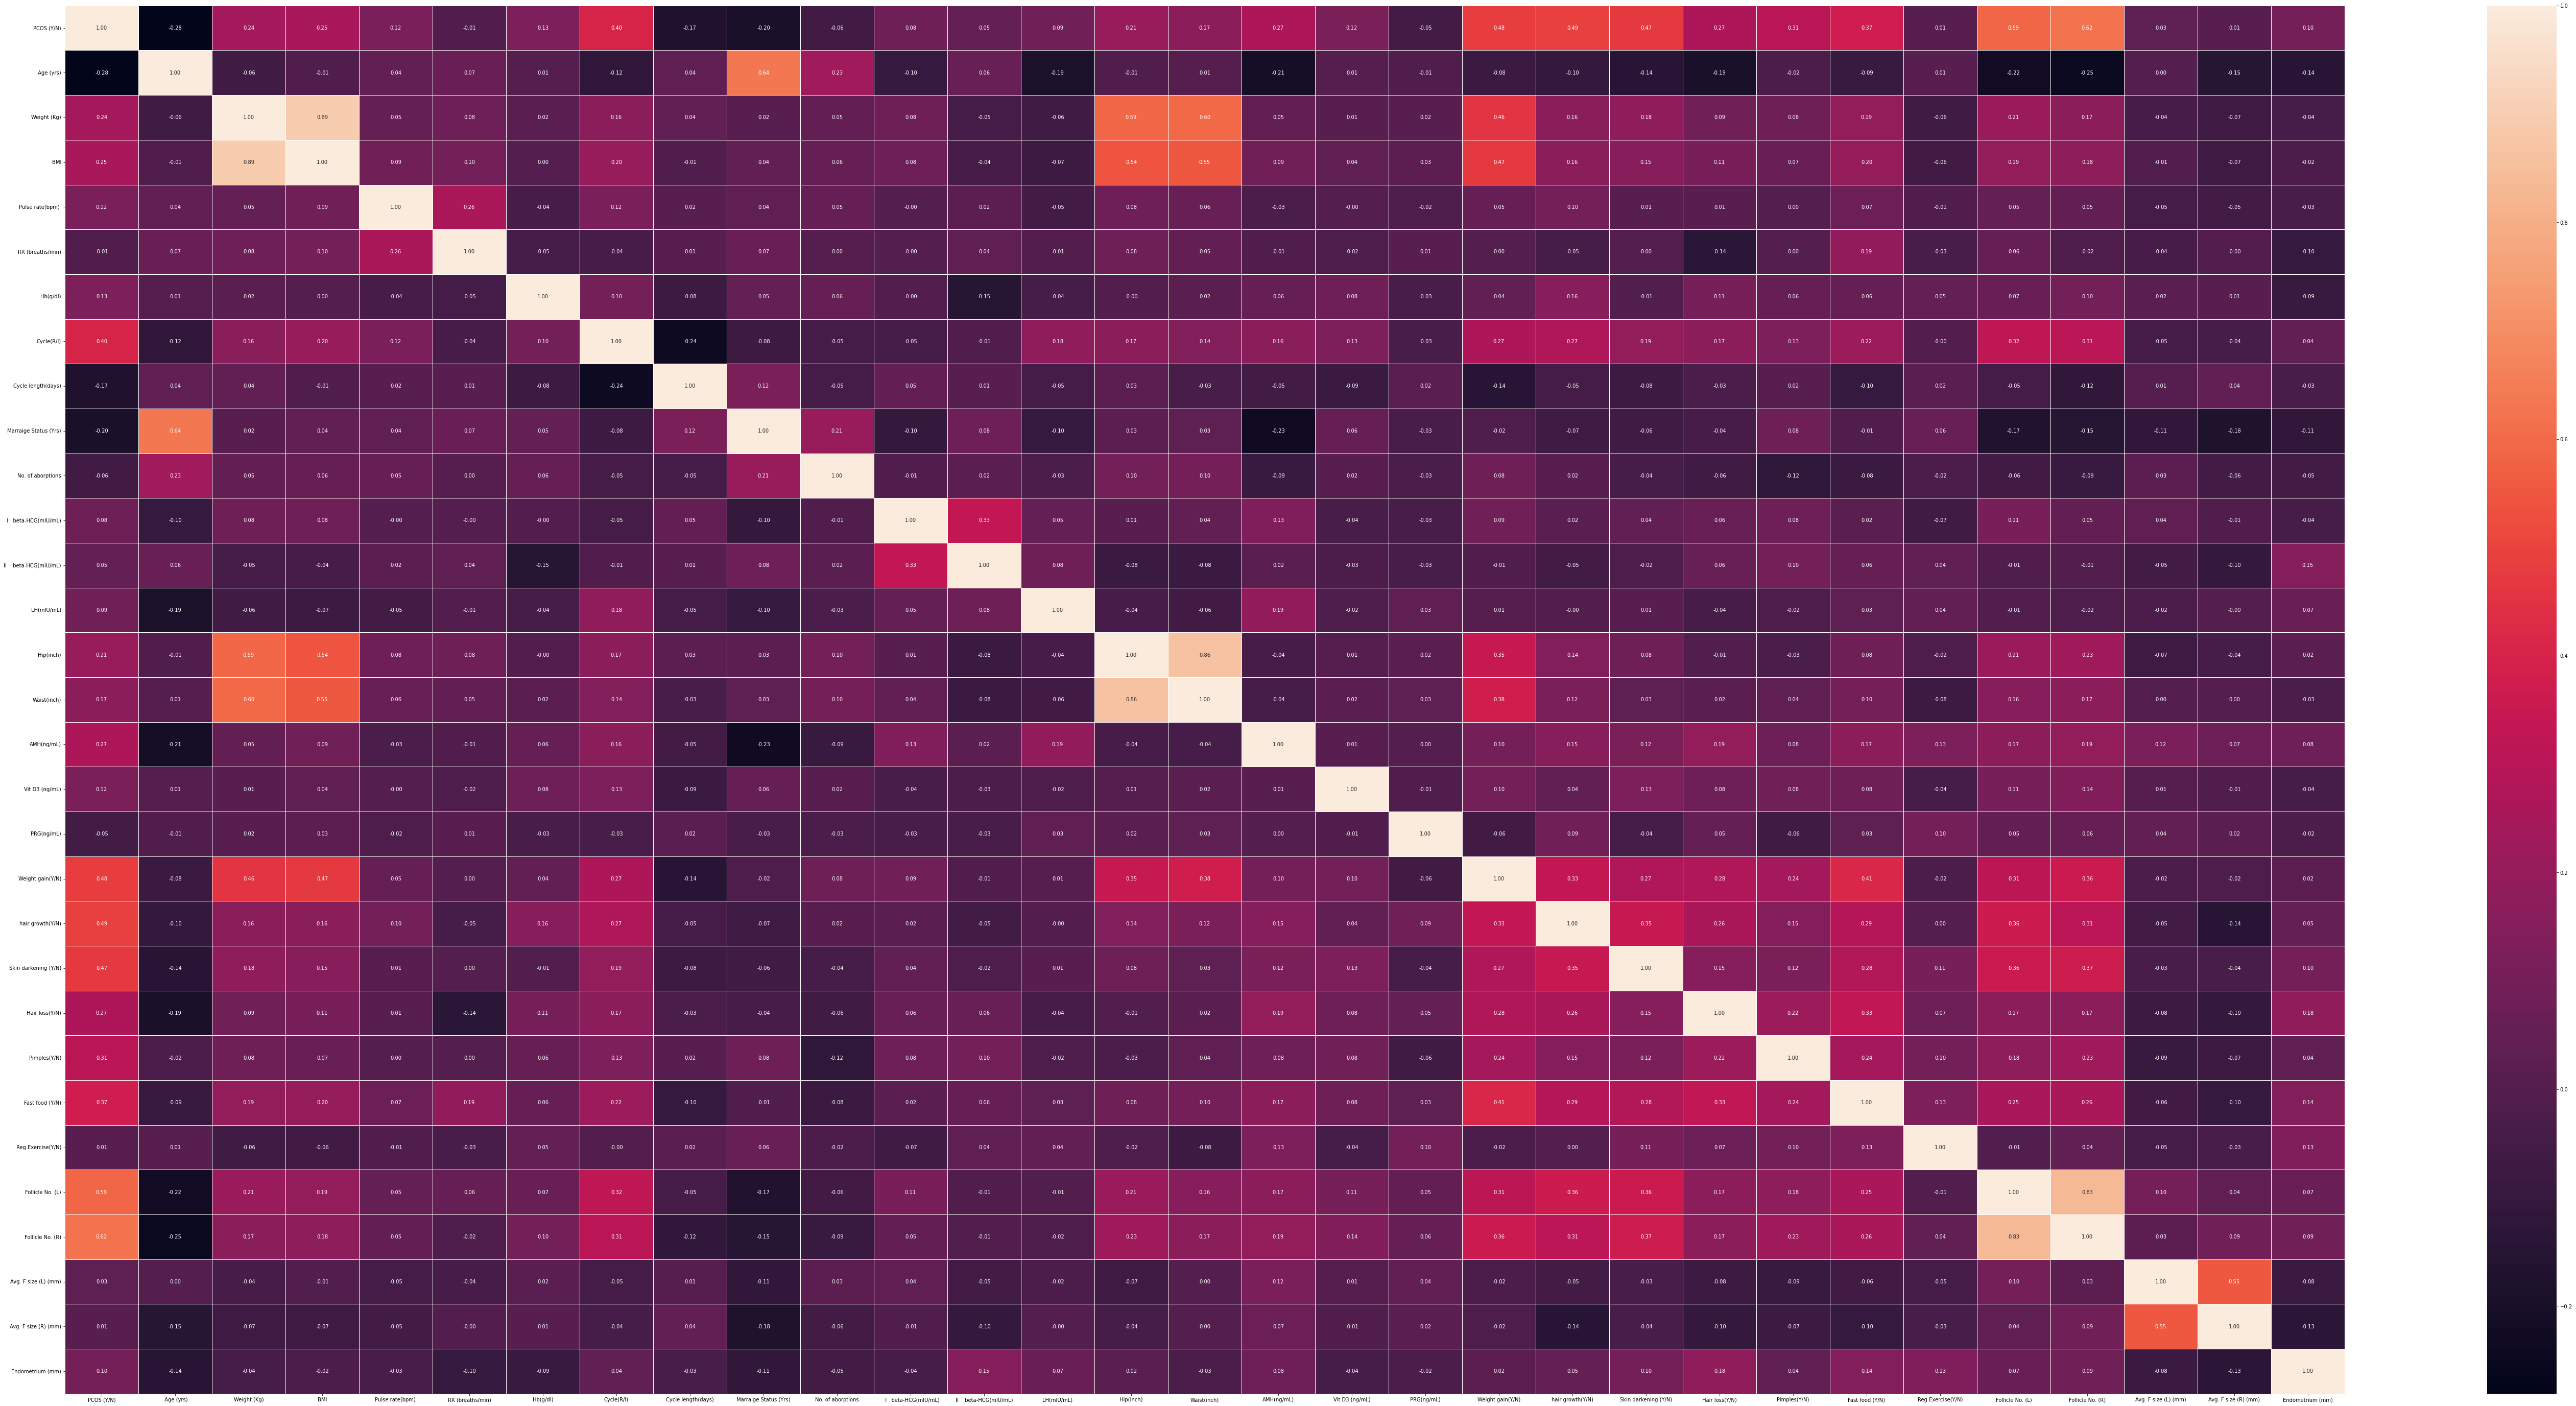

In [ ]:
corr_matrix = data.corr()
fig , ax = plt.subplots(figsize=(100,50))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

<Axes: title={'center': 'Correlation with PCOS'}>

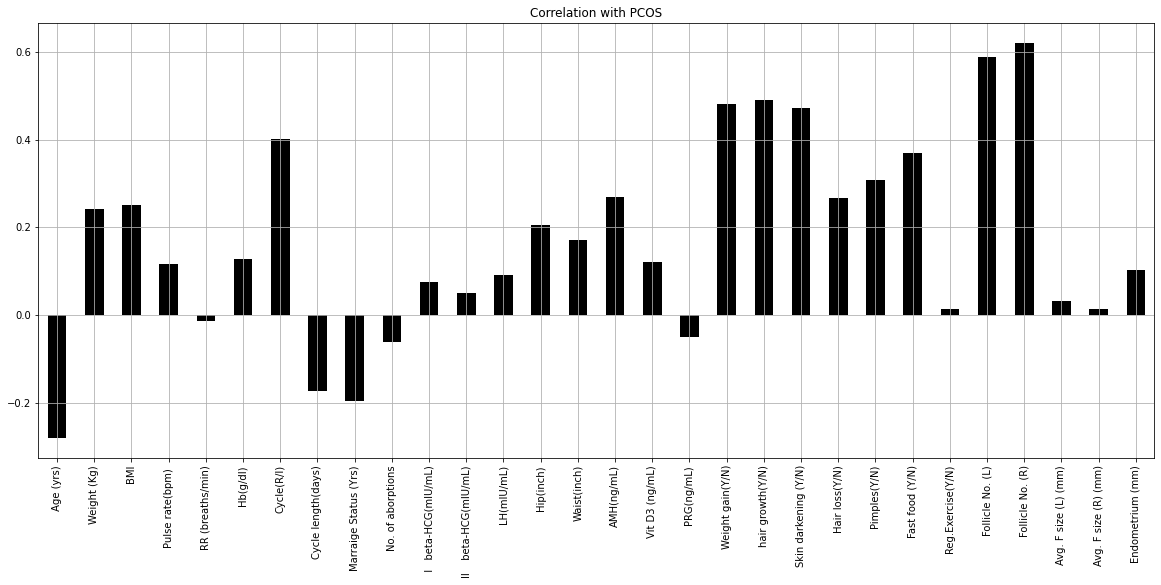

In [ ]:
data.drop('PCOS (Y/N)', axis=1).corrwith(data['PCOS (Y/N)']).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with PCOS",color="Black")

In [ ]:
data.drop('Weight (Kg)',axis=1,inplace=True)
data.drop('RR (breaths/min)',axis=1,inplace=True)
data.drop('Reg.Exercise(Y/N)',axis=1,inplace=True)
data.drop('Avg. F size (R) (mm)',axis=1,inplace=True)

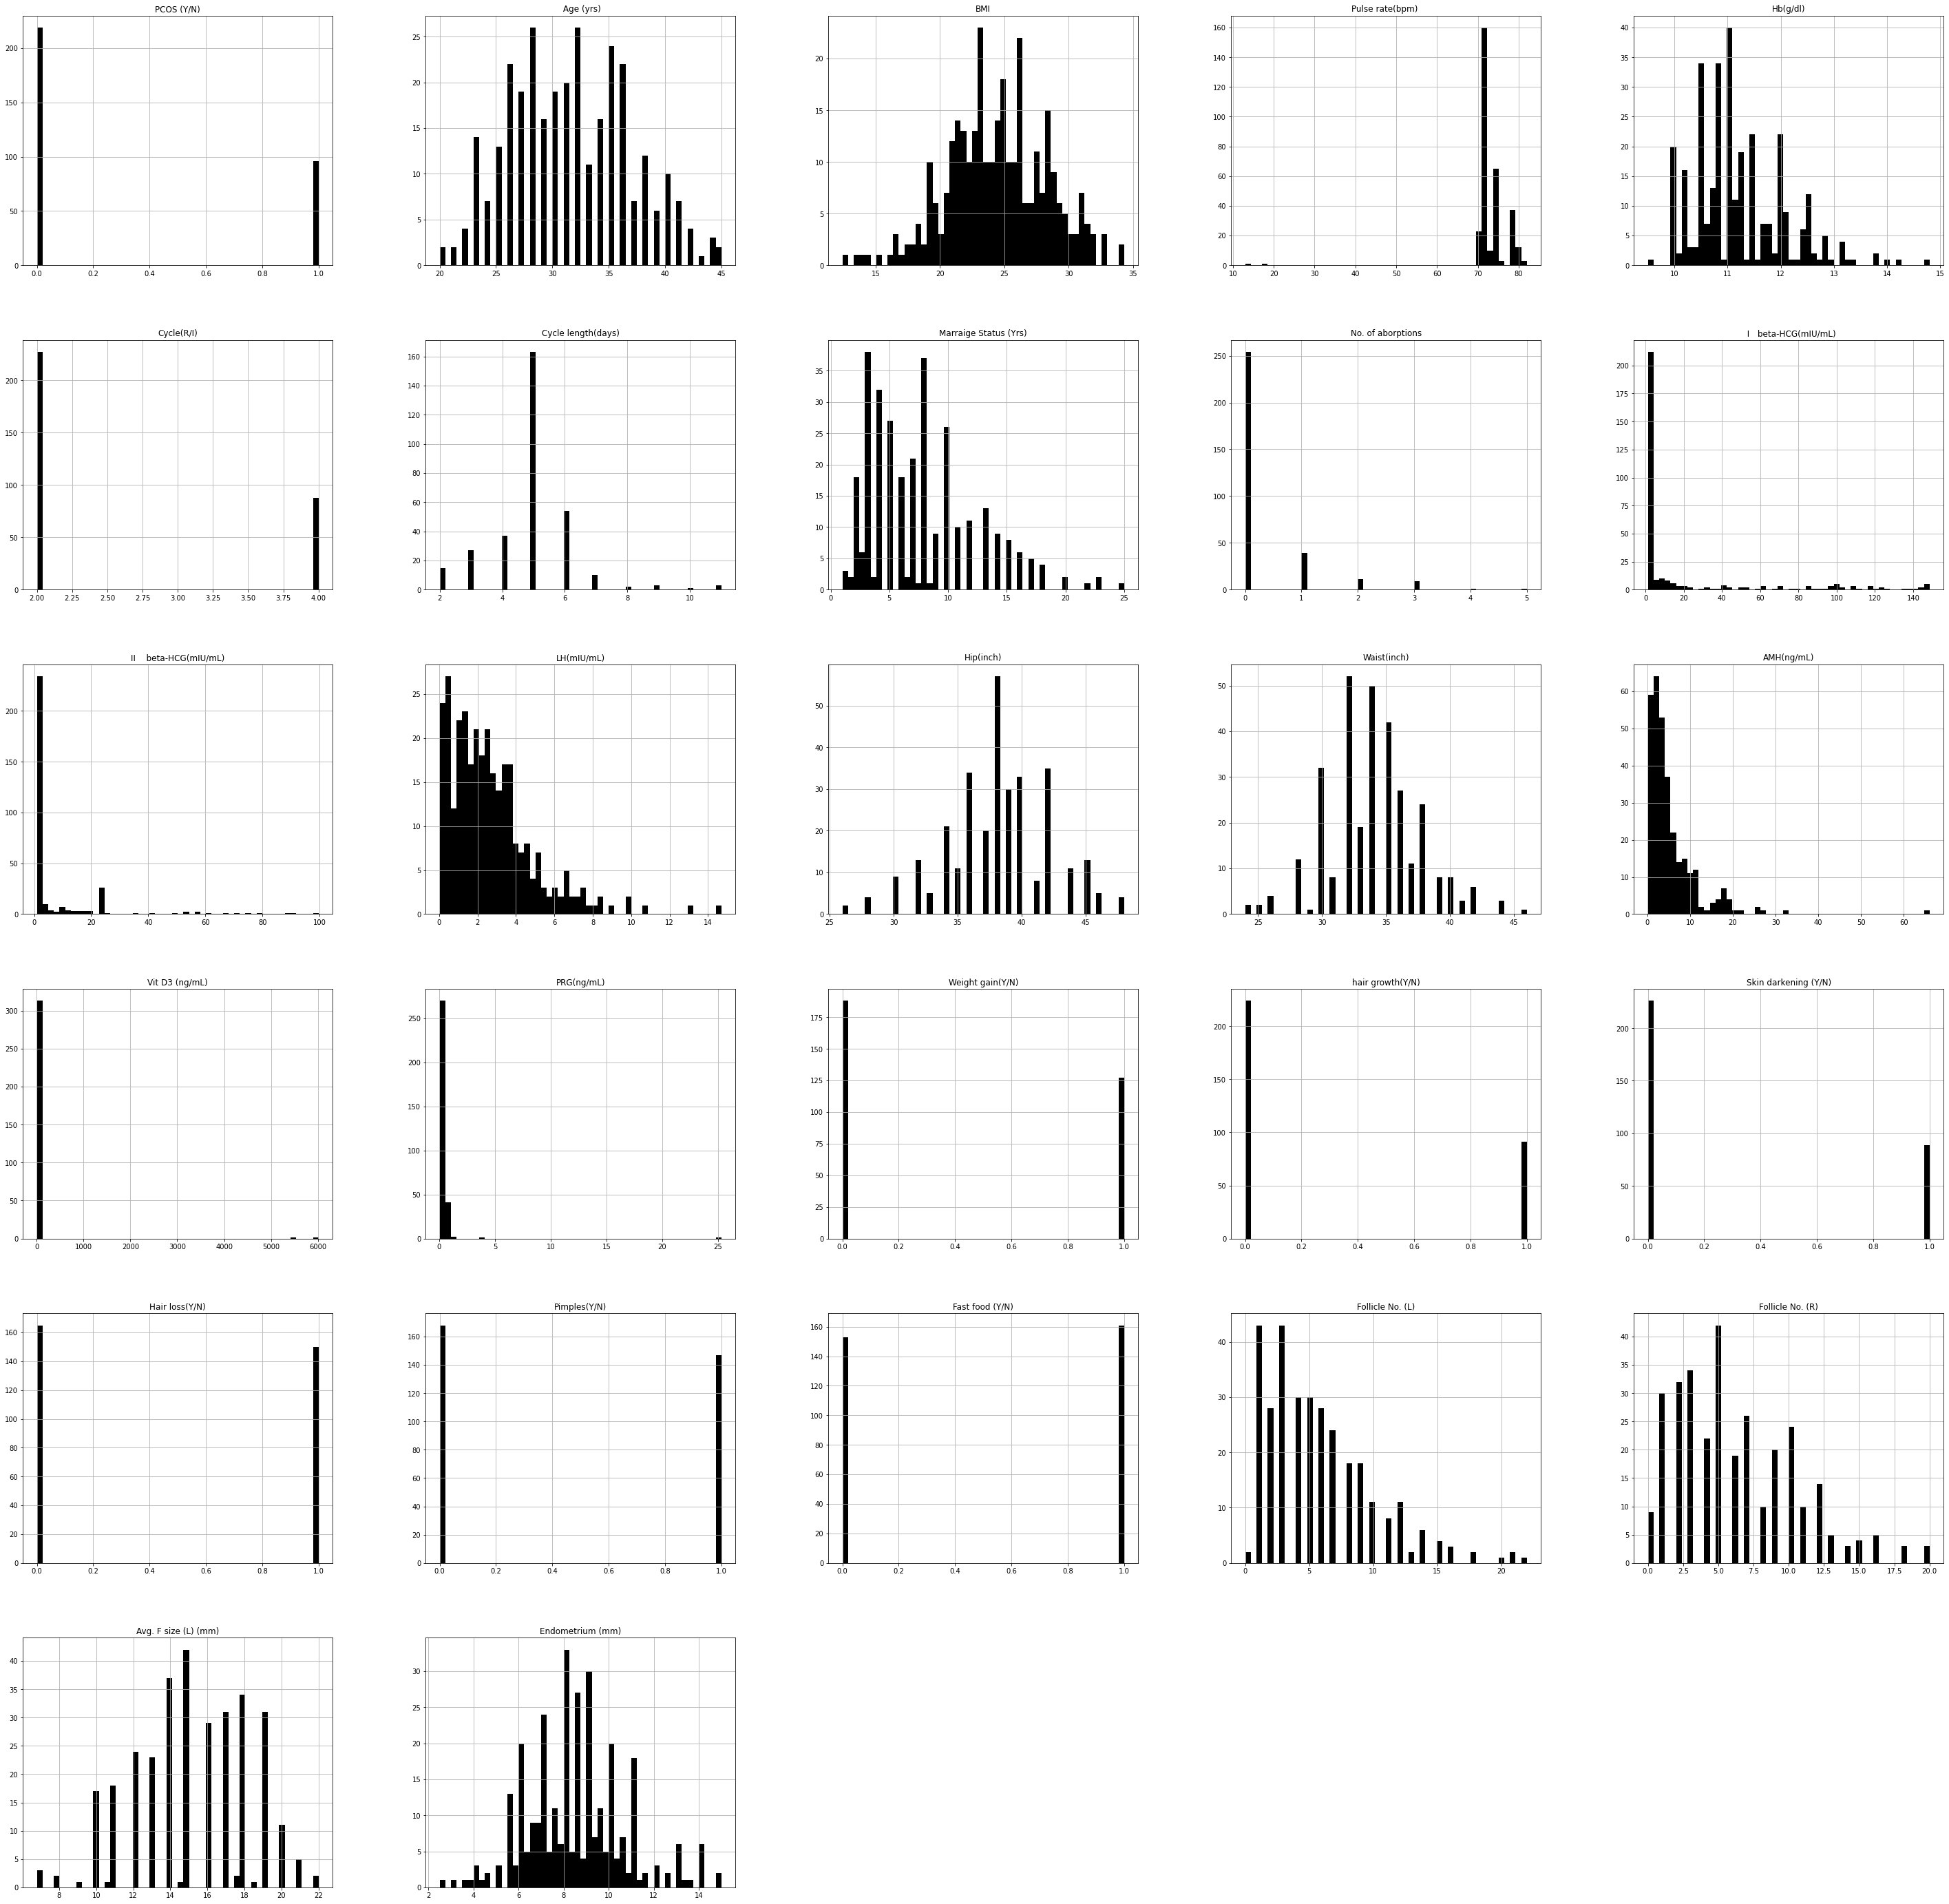

In [ ]:
data.hist(bins=50,figsize=(50,50),color='black');

In [ ]:
pulse_rate_mean = np.array(data['Pulse rate(bpm) ']).mean()

pulse_rate_i = []
y=0

for i in data['Pulse rate(bpm) ']:
    if i<60:
      pulse_rate_i.append(y)

    y+=1

for i in pulse_rate_i:
  data['Pulse rate(bpm) '] = data['Pulse rate(bpm) '].replace(data.iloc[i,3],pulse_rate_mean)

# Modeliing

In [ ]:
#Cycle(R/I),Cycle length(days),No. of aborptions,Weight gain(Y/N), hair growth(Y/N),Skin darkening(Y/N),Hair Loss(Y/N),Pimples(Y/N),FastFood(Y/N),

In [ ]:
X = data.drop('PCOS (Y/N)',axis=1)
Y = data['PCOS (Y/N)']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
X_train.columns

Index([' Age (yrs)', 'BMI', 'Pulse rate(bpm) ', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)',
       'Hip(inch)', 'Waist(inch)', 'AMH(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [ ]:
Columns = list(X_train.columns)

One_Hot = ['Cycle(R/I)','Cycle length(days)','No. of aborptions','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Hair loss(Y/N)', 'Pimples(Y/N)','Fast food (Y/N)']

for i in One_Hot:
  Columns.remove(i)

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), Columns),
    (OneHotEncoder(handle_unknown='ignore'),One_Hot))

In [ ]:
ct.fit(X_train)

X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
#Setting random seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(2,activation='softmax')
])

#Compile the Model
model_1.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(lr=0.001), 
    metrics=['accuracy']
)

#Fit the Model
history_1=model_1.fit(X_train_ct,Y_train,epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6570 - accuracy: 0.6944
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.6865
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7183
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7698
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8056
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8175
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.8373
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8452
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8452
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8452
Epoch 11/100
8/8 [===========

In [ ]:
#HDF5 format
model_1.save("PCOS.h5")